# Champion Analysis v1.5 - Mockingbird Prototype

*This notebook is a prototype for the Champion Analysis Notebook. It may be used in the final product upon adjustment and approval, designated as the visualizations notebook to compliment the Lightning Prototype.*

In [13]:
# Dependency Center
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import hvplot.pandas
import csv

## Lightning Protoype Import

In [2]:
# Import data from CSV
pokemon_df = pd.read_csv('Extractions/Refined Pokemon Roster.csv')
pokemon_df

,Name,Primary Type,Secondary Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Height (in),Weight (lbs),Legendary,Mythical
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,27.56,15.21,False,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,39.37,28.66,False,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,78.74,220.46,False,False
3,Charmander,Fire,NaN,39,52,43,60,50,65,23.62,18.74,False,False
4,Charmeleon,Fire,NaN,58,64,58,80,65,80,43.31,41.89,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,Regieleki,Electric,NaN,80,100,50,100,50,200,47.24,319.67,True,False
894,Regidrago,Dragon,NaN,200,100,50,100,50,80,82.68,440.92,True,False
895,Glastrier,Ice,NaN,100,145,130,65,110,30,86.61,1763.70,True,False
896,Spectrier,Ghost,NaN,100,65,60,145,80,130,78.74,98.11,True,False


## Mockingbird Prototype Visualizations

### Type Distribution
*What are the most common types amongst Pokemon?*

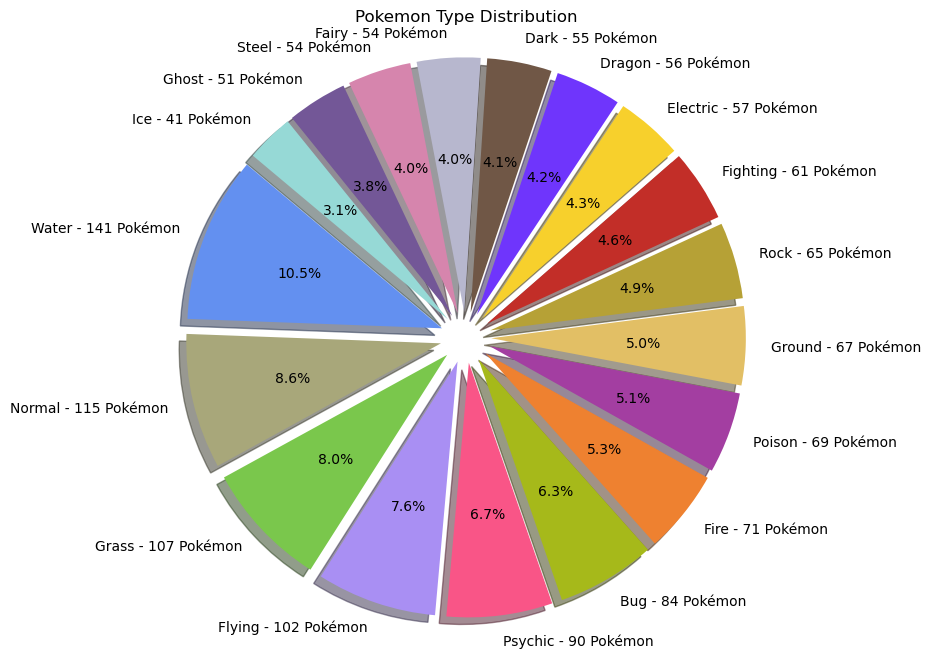

<Figure size 640x480 with 0 Axes>

In [3]:
# Type Distribution Chart
# Concatenate the 'Primary Type' and 'Secondary Type' columns
all_types = pd.concat([pokemon_df['Primary Type'], pokemon_df['Secondary Type']])

# Remove any 'None' values
all_types = all_types[all_types != 'None']

# Get counts for each type
type_counts = all_types.value_counts()
# Define a list of colors
colors = [
    '#6390F0', # Water
    '#A8A77A', # Normal
    '#7AC74C', # Grass
    '#A98FF3', # Flying
    '#F95587', # Psychic
    '#A6B91A', # Bug
    '#EE8130', # Fire
    '#A33EA1', # Poison
    '#E2BF65', # Ground
    '#B6A136', # Rock
    '#C22E28', # Fighting
    '#F7D02C', # Electric
    '#6F35FC', # Dragon
    '#705746', # Dark
    '#B7B7CE', # Steel
    '#D685AD', # Fairy
    '#735797', # Ice
    '#96D9D6' # Ghost
    ]

# Define labels
labels = [f'{label} - {count} Pokémon' for label, count in zip(type_counts.index, type_counts.values)]

# Explode each slice a little bit to make the chart more appealing
explode = [0.1] * len(type_counts)

plt.figure(figsize=(10,8))
plt.pie(type_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.axis('equal')
plt.title('Pokemon Type Distribution')
plt.show()

# Save Figure
plt.savefig("Visualizations/Pokemon Type Distribution.png")

# Show Figure
plt.show()

### Highest Average Attack by Type
*Which type has the highest average attack stat?*

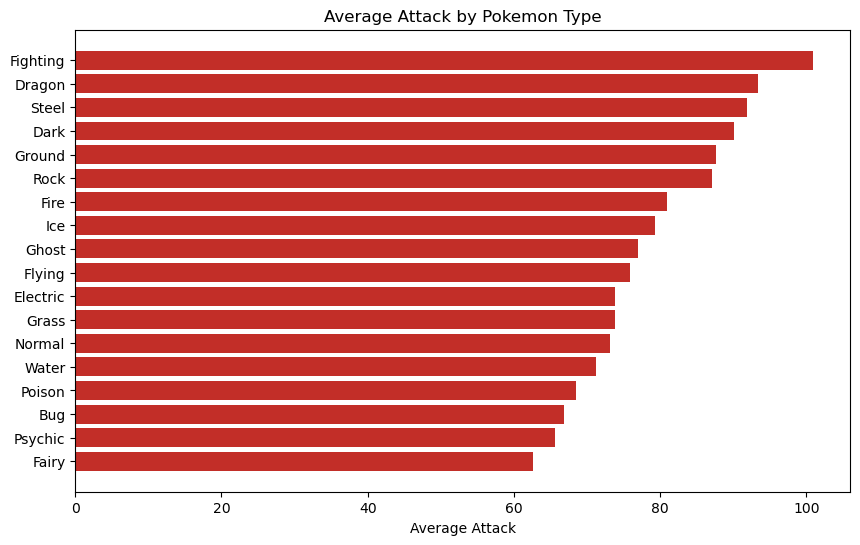

In [4]:
# Attack Distribution Chart
# Melt 'Primary Type' and 'Secondary Type' into one column
melted_df = pd.melt(pokemon_df, id_vars=['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], 
                    value_vars=['Primary Type', 'Secondary Type'], 
                    var_name='Type Variable', value_name='Type').dropna()

# Group by 'Type' and calculate mean of 'Attack' for each group
type_attack_means = melted_df.groupby('Type')['Attack'].mean()

# Sort by the mean 'Attack'
type_attack_means = type_attack_means.sort_values()

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.barh(type_attack_means.index, type_attack_means.values, color='#C22E28')

# Set the title and labels
plt.xlabel('Average Attack')
plt.title('Average Attack by Pokemon Type')

# Save the plot
plt.savefig('Visualizations/Average Attack by Pokemon Type.png')

# Show the plot
plt.show()

### Highest Average Special Attack by Type
*Which type has the highest average special attack stat?*

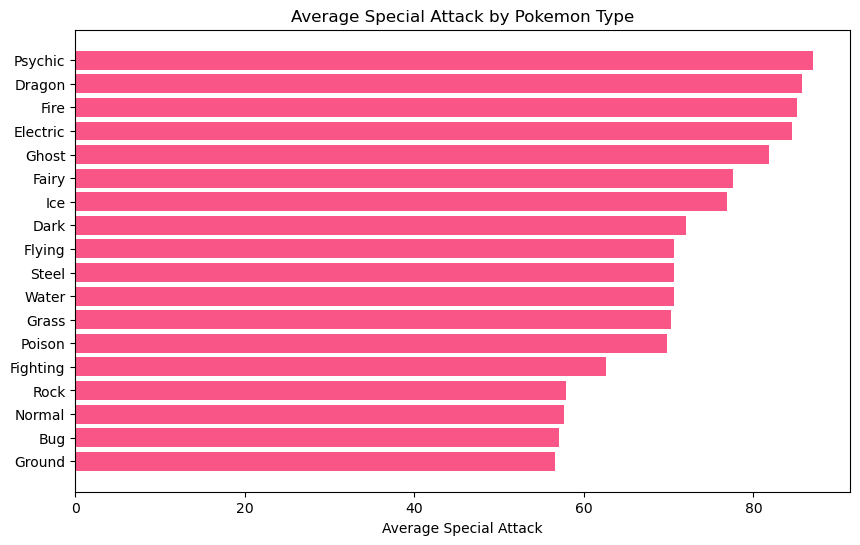

In [7]:
# Special Attack Distribution Chart
# Group by 'Type' and calculate mean of 'Sp. Atk' for each group
type_sp_attack_means = melted_df.groupby('Type')['Sp. Atk'].mean()

# Sort by the mean 'Sp. Atk'
type_sp_attack_means = type_sp_attack_means.sort_values()

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.barh(type_sp_attack_means.index, type_sp_attack_means.values, color='#F95587')

# Set the title and labels
plt.xlabel('Average Special Attack')
plt.title('Average Special Attack by Pokemon Type')

# Save the plot
plt.savefig('Visualizations/Average Special Attack by Pokemon Type.png')

# Show the plot
plt.show()

### Highest Average Defense by Type
*Which type has the highest average defense stat?*

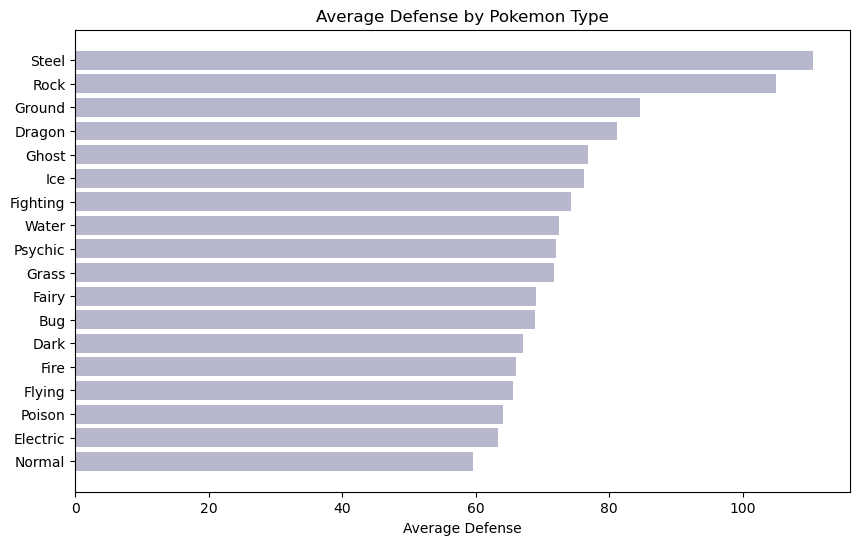

In [8]:
# Defense Distribution Chart
# Group by 'Type' and calculate mean of 'Defense' for each group
type_defense_means = melted_df.groupby('Type')['Defense'].mean()

# Sort by the mean 'Defense'
type_defense_means = type_defense_means.sort_values()

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.barh(type_defense_means.index, type_defense_means.values, color='#B7B7CE')

# Set the title and labels
plt.xlabel('Average Defense')
plt.title('Average Defense by Pokemon Type')

# Save the plot
plt.savefig('Visualizations/Average Defense by Pokemon Type.png')

# Show the plot
plt.show()


### Highest Average Special Defense by Type
*Which type has the highest average special defense stat?*

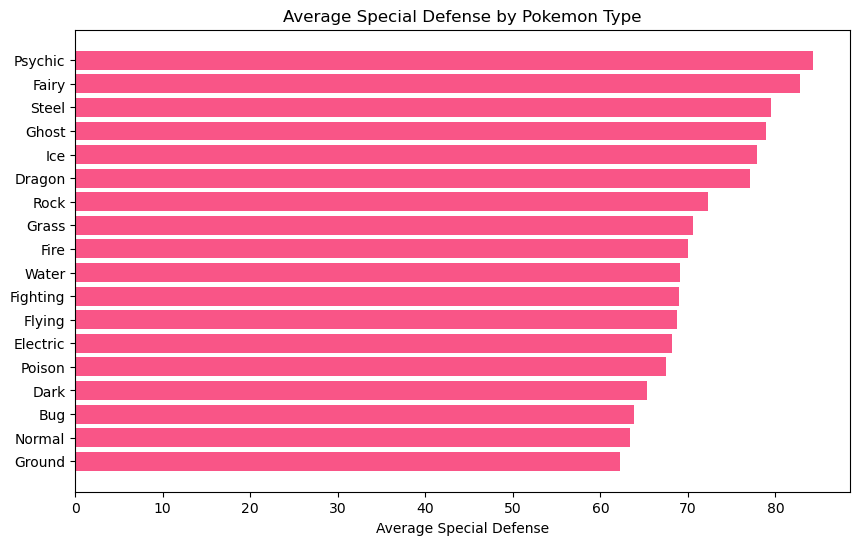

In [9]:
# Special Defense Distribution Chart
# Group by 'Type' and calculate mean of 'Sp. Def' for each group
type_sp_defense_means = melted_df.groupby('Type')['Sp. Def'].mean()

# Sort by the mean 'Sp. Def'
type_sp_defense_means = type_sp_defense_means.sort_values()

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.barh(type_sp_defense_means.index, type_sp_defense_means.values, color='#F95587')

# Set the title and labels
plt.xlabel('Average Special Defense')
plt.title('Average Special Defense by Pokemon Type')

# Save the plot
plt.savefig('Visualizations/Average Special Defense by Pokemon Type.png')

# Show the plot
plt.show()

### Highest Average Speed by Type
*Which type has the highest average speed stat?*

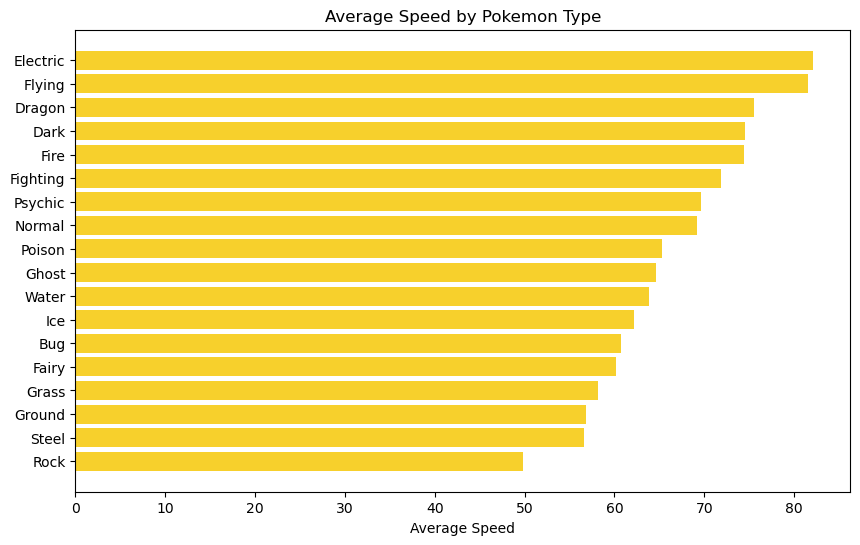

In [10]:
# Speed Distribution Chart
# Group by 'Type' and calculate mean of 'Speed' for each group
type_speed_means = melted_df.groupby('Type')['Speed'].mean()

# Sort by the mean 'Speed'
type_speed_means = type_speed_means.sort_values()

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.barh(type_speed_means.index, type_speed_means.values, color='#F7D02C')

# Set the title and labels
plt.xlabel('Average Speed')
plt.title('Average Speed by Pokemon Type')

# Save the plot
plt.savefig('Visualizations/Average Speed by Pokemon Type.png')

# Show the plot
plt.show()

### Highest Average HP by Type
*Which type has the highest average HP stat?*

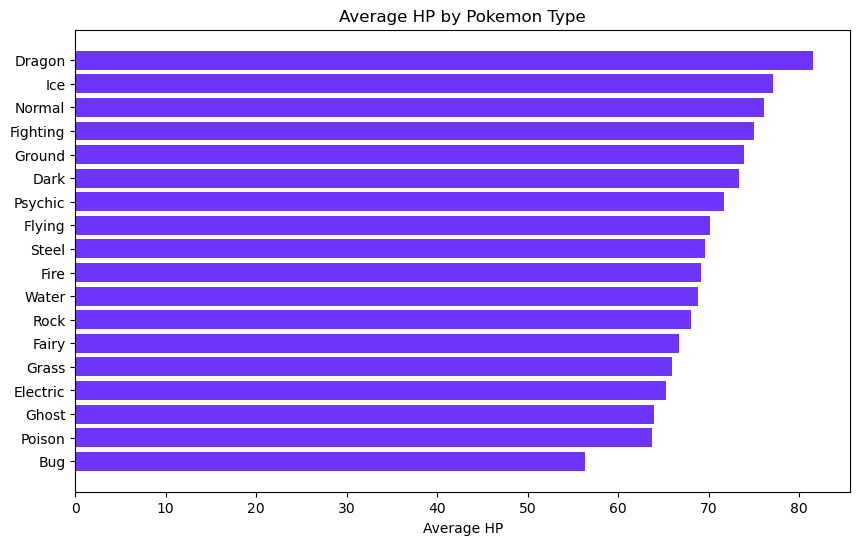

In [34]:
# HP Distribution Chart
# Group by 'Type' and calculate mean of 'HP' for each group
type_hp_means = melted_df.groupby('Type')['HP'].mean()

# Sort by the mean 'HP'
type_hp_means = type_hp_means.sort_values()

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.barh(type_hp_means.index, type_hp_means.values, color='#6F35FC')

# Set the title and labels
plt.xlabel('Average HP')
plt.title('Average HP by Pokemon Type')

# Save the plot
plt.savefig('Visualizations/Average HP by Pokemon Type.png')

# Show the plot
plt.show()

## Size and Stat Relationships
*How does the size of a Pokemon relate to its stats? To better understand the correlation (or lack thereof) between size and stats, we will be using various visualizations to compare the two.*

### Correlations Between Size and Health/Speed
*Does bigger and bulkier always mean healthier? Does smaller always mean faster?*

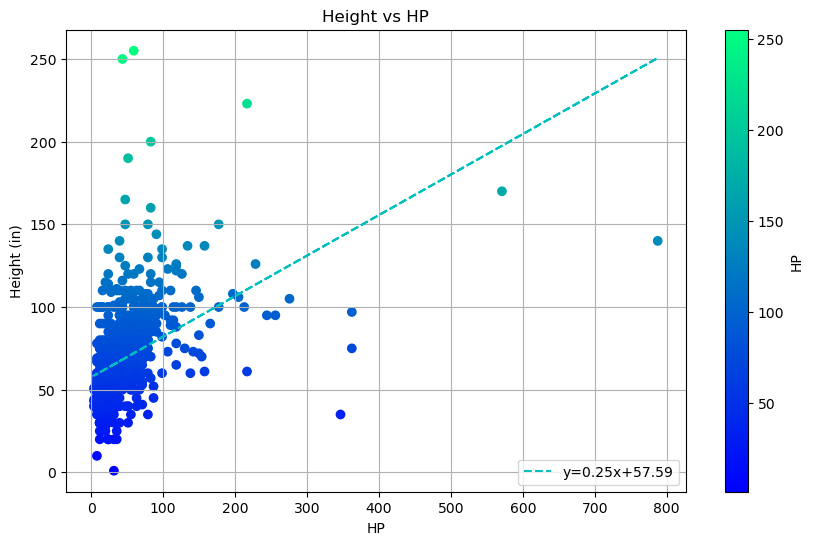

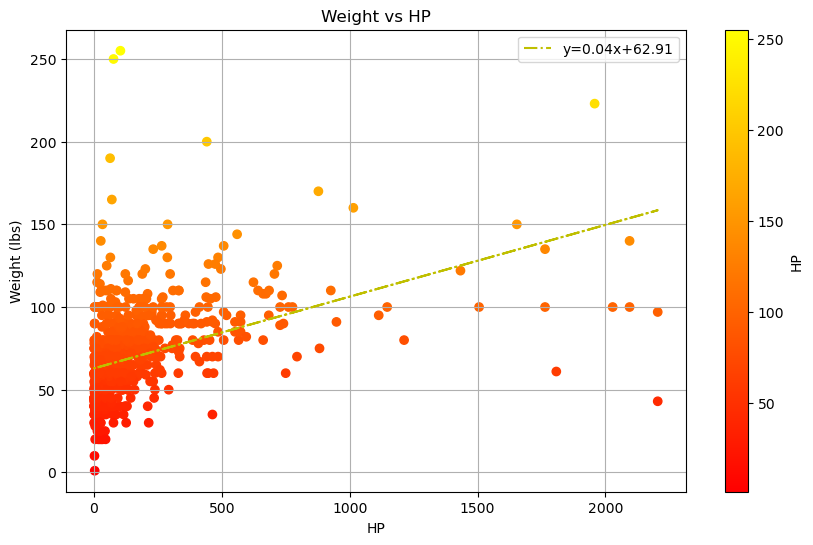

In [35]:
# Scatter plot: Height vs HP
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Height (in)'], pokemon_df['HP'])
line = slope * pokemon_df['Height (in)'] + intercept

plt.scatter(pokemon_df['Height (in)'], pokemon_df['HP'], c=pokemon_df['HP'], cmap='winter')
plt.plot(pokemon_df['Height (in)'], line, 'c--', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='HP')
plt.xlabel('HP')
plt.ylabel('Height (in)')
plt.title('Height vs HP')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot: Weight vs HP
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Weight (lbs)'], pokemon_df['HP'])
line = slope * pokemon_df['Weight (lbs)'] + intercept

plt.scatter(pokemon_df['Weight (lbs)'], pokemon_df['HP'], c=pokemon_df['HP'], cmap='autumn')
plt.plot(pokemon_df['Weight (lbs)'], line, 'y-.', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='HP')
plt.xlabel('HP')
plt.ylabel('Weight (lbs)')
plt.title('Weight vs HP')
plt.legend()
plt.grid(True)
plt.show()


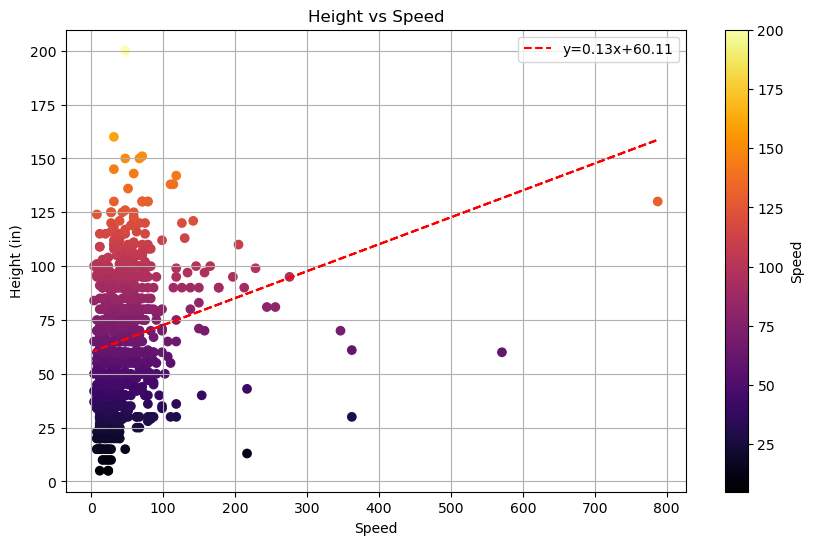

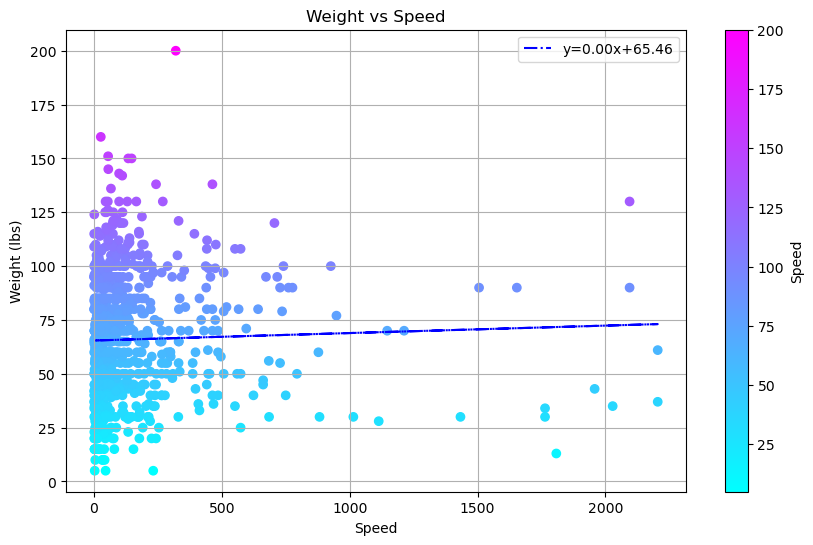

In [38]:
# Scatter plot: Height vs Speed
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Height (in)'], pokemon_df['Speed'])
line = slope * pokemon_df['Height (in)'] + intercept

plt.scatter(pokemon_df['Height (in)'], pokemon_df['Speed'], c=pokemon_df['Speed'], cmap='inferno')
plt.plot(pokemon_df['Height (in)'], line, 'r--', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Speed')
plt.xlabel('Speed')
plt.ylabel('Height (in)')
plt.title('Height vs Speed')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot: Weight vs Speed
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Weight (lbs)'], pokemon_df['Speed'])
line = slope * pokemon_df['Weight (lbs)'] + intercept

plt.scatter(pokemon_df['Weight (lbs)'], pokemon_df['Speed'], c=pokemon_df['Speed'], cmap='cool')
plt.plot(pokemon_df['Weight (lbs)'], line, 'b-.', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Speed')
plt.xlabel('Speed')
plt.ylabel('Weight (lbs)')
plt.title('Weight vs Speed')
plt.legend()
plt.grid(True)
plt.show()


### Correlations Between Size and Offensive Stats
*Does bigger and bulkier always mean stronger?*

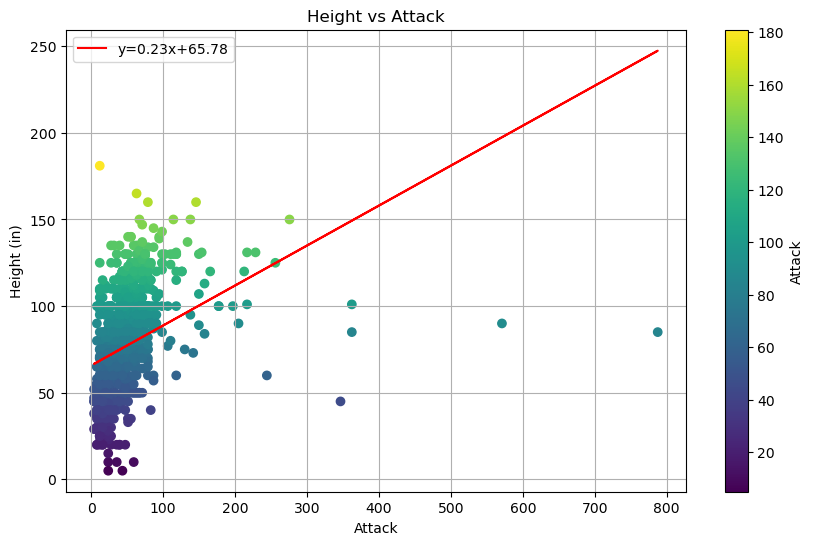

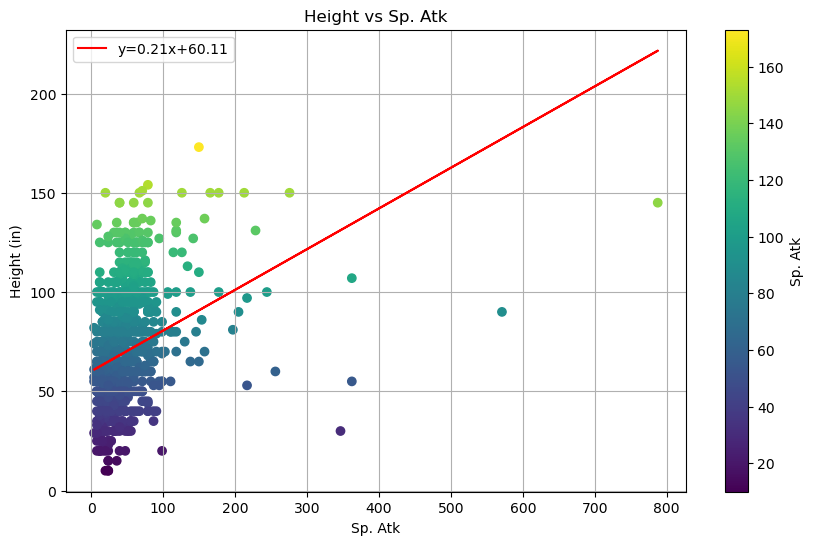

In [36]:
# Scatter plot: Height vs Attack
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Height (in)'], pokemon_df['Attack'])
line = slope * pokemon_df['Height (in)'] + intercept

plt.scatter(pokemon_df['Height (in)'], pokemon_df['Attack'], c=pokemon_df['Attack'], cmap='viridis')
plt.plot(pokemon_df['Height (in)'], line, 'r', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Attack')
plt.xlabel('Attack')
plt.ylabel('Height (in)')
plt.title('Height vs Attack')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot: Height vs Sp. Atk
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Height (in)'], pokemon_df['Sp. Atk'])
line = slope * pokemon_df['Height (in)'] + intercept

plt.scatter(pokemon_df['Height (in)'], pokemon_df['Sp. Atk'], c=pokemon_df['Sp. Atk'], cmap='viridis')
plt.plot(pokemon_df['Height (in)'], line, 'r', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Sp. Atk')
plt.xlabel('Sp. Atk')
plt.ylabel('Height (in)')
plt.title('Height vs Sp. Atk')
plt.legend()
plt.grid(True)
plt.show()


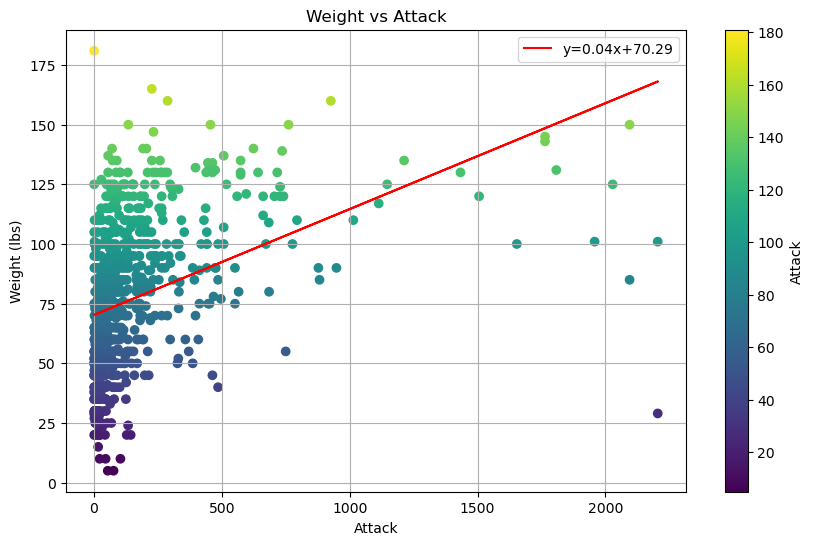

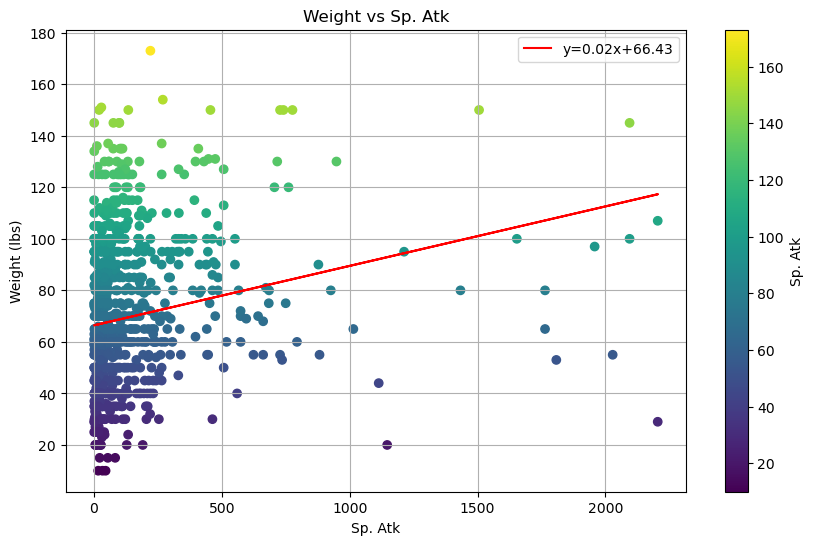

In [37]:
# Scatter plot: Weight vs Attack
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Weight (lbs)'], pokemon_df['Attack'])
line = slope * pokemon_df['Weight (lbs)'] + intercept

plt.scatter(pokemon_df['Weight (lbs)'], pokemon_df['Attack'], c=pokemon_df['Attack'], cmap='viridis')
plt.plot(pokemon_df['Weight (lbs)'], line, 'r', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Attack')
plt.xlabel('Attack')
plt.ylabel('Weight (lbs)')
plt.title('Weight vs Attack')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot: Weight vs Sp. Atk
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Weight (lbs)'], pokemon_df['Sp. Atk'])
line = slope * pokemon_df['Weight (lbs)'] + intercept

plt.scatter(pokemon_df['Weight (lbs)'], pokemon_df['Sp. Atk'], c=pokemon_df['Sp. Atk'], cmap='viridis')
plt.plot(pokemon_df['Weight (lbs)'], line, 'r', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Sp. Atk')
plt.xlabel('Sp. Atk')
plt.ylabel('Weight (lbs)')
plt.title('Weight vs Sp. Atk')
plt.legend()
plt.grid(True)
plt.show()

### Correlations Between Size and Defensive Stats
*Does bigger and bulkier always mean more defensive?*

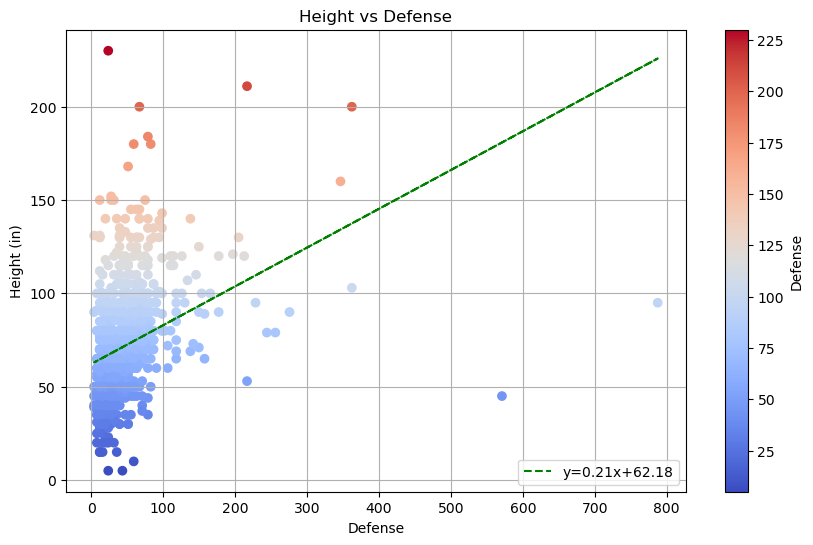

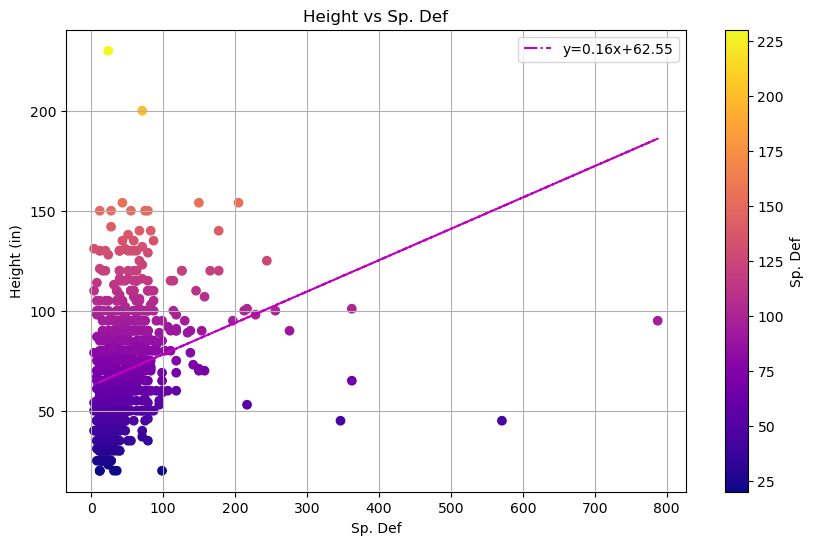

In [32]:
# Scatter plot: Height vs Defense
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Height (in)'], pokemon_df['Defense'])
line = slope * pokemon_df['Height (in)'] + intercept

plt.scatter(pokemon_df['Height (in)'], pokemon_df['Defense'], c=pokemon_df['Defense'], cmap='coolwarm')
plt.plot(pokemon_df['Height (in)'], line, 'g--', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Defense')
plt.xlabel('Defense')
plt.ylabel('Height (in)')
plt.title('Height vs Defense')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot: Height vs Sp. Def
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Height (in)'], pokemon_df['Sp. Def'])
line = slope * pokemon_df['Height (in)'] + intercept

plt.scatter(pokemon_df['Height (in)'], pokemon_df['Sp. Def'], c=pokemon_df['Sp. Def'], cmap='plasma')
plt.plot(pokemon_df['Height (in)'], line, 'm-.', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Sp. Def')
plt.xlabel('Sp. Def')
plt.ylabel('Height (in)')
plt.title('Height vs Sp. Def')
plt.legend()
plt.grid(True)
plt.show()


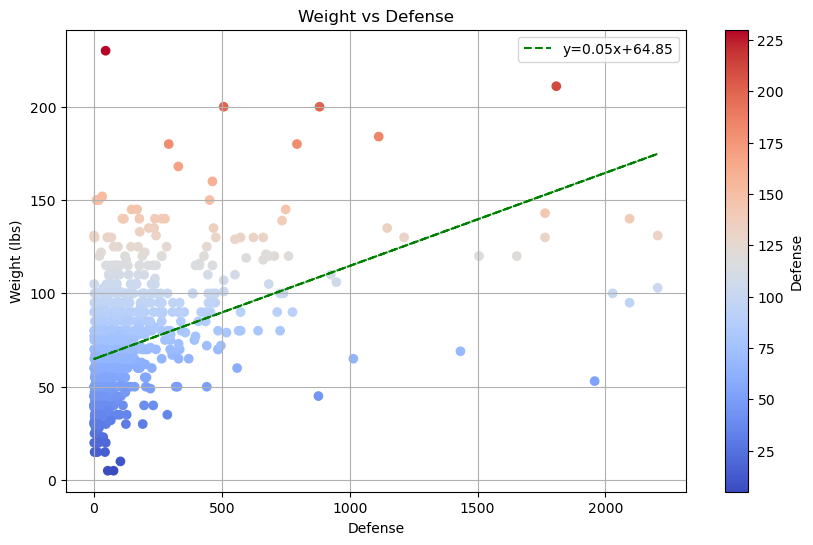

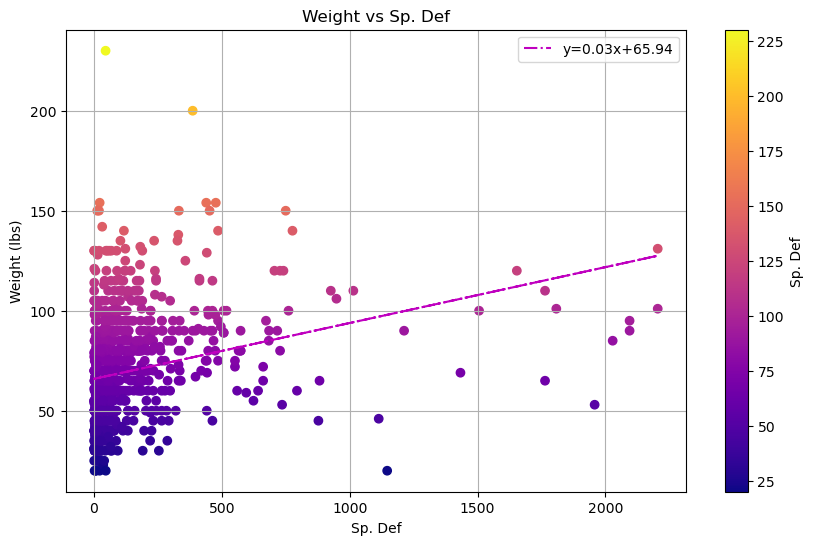

In [33]:
# Scatter plot: Weight vs Defense
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Weight (lbs)'], pokemon_df['Defense'])
line = slope * pokemon_df['Weight (lbs)'] + intercept

plt.scatter(pokemon_df['Weight (lbs)'], pokemon_df['Defense'], c=pokemon_df['Defense'], cmap='coolwarm')
plt.plot(pokemon_df['Weight (lbs)'], line, 'g--', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Defense')
plt.xlabel('Defense')
plt.ylabel('Weight (lbs)')
plt.title('Weight vs Defense')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot: Weight vs Sp. Def
plt.figure(figsize=(10, 6))

# Calculate the regression line
slope, intercept, _, _, _ = st.linregress(pokemon_df['Weight (lbs)'], pokemon_df['Sp. Def'])
line = slope * pokemon_df['Weight (lbs)'] + intercept

plt.scatter(pokemon_df['Weight (lbs)'], pokemon_df['Sp. Def'], c=pokemon_df['Sp. Def'], cmap='plasma')
plt.plot(pokemon_df['Weight (lbs)'], line, 'm-.', label=f'y={slope:.2f}x+{intercept:.2f}')

plt.colorbar(label='Sp. Def')
plt.xlabel('Sp. Def')
plt.ylabel('Weight (lbs)')
plt.title('Weight vs Sp. Def')
plt.legend()
plt.grid(True)
plt.show()


### Correlation Heatmap
*Correlation coefficients for aforementioned comparisons and more.*

C:\Users\WolfA\AppData\Local\Temp\ipykernel_20852\1812140298.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_df.corr()


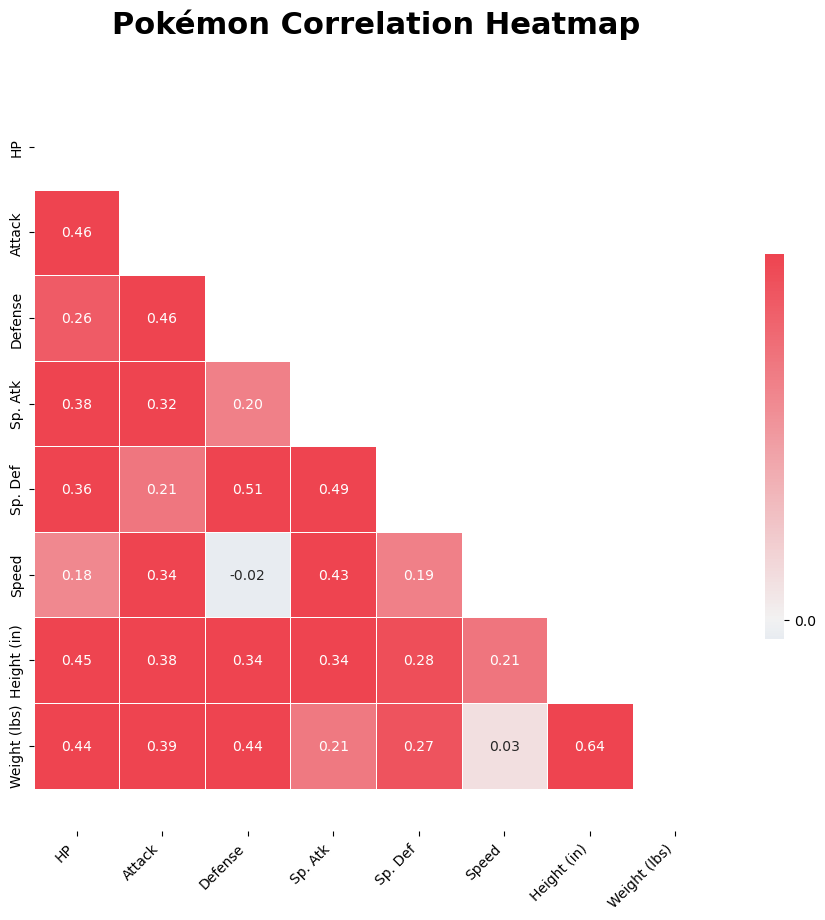

In [39]:
# Correlation Heatmap
# Drop 'Legendary' and 'Mythical' columns
corr_df = pokemon_df.drop(['Legendary', 'Mythical'], axis=1)

# Calculate the correlation matrix
corr = corr_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

# Create a custom colormap
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, fmt=".2f",
            square=True, linewidths=0.5, cbar_kws={"shrink": .5, "ticks" : [-1, -.5, 0, 0.5, 1]})

# Title for the heatmap
ax.set_title('Pokémon Correlation Heatmap', fontsize=22, fontweight='bold', pad=20)

# Fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

# Rotate the bottom labels
plt.xticks(rotation=45, ha='right')

# Save the plot
plt.savefig('Visualizations/Correlation Heatmap.png')

# Show the plot
plt.show()


## The Team of a Champion
*Taking into consideration the previous visualizations, what would the Champion's team look like? In an official Pokemon Championship match, Legendaries and Mythicals are not allowed, and only a team of six are allowed to compete on each side.*

*We aim to answer three questions at this point:*
* *What team of six can we build with each Pokemon representing the highest individual stat?*
* *What team of six has the highest total stats?*
* *Which of the two teams would provide the best chance of winning and why?*

In [47]:
# Create a new DataFrame for Regular Pokemon (non-Legendary and non-Mythical)
regular_pokemon = pokemon_df.loc[(pokemon_df['Legendary'] == False) & (pokemon_df['Mythical'] == False)]

# Create a new DataFrame for Legendary and Mythical Pokemon together
elite_pokemon = pokemon_df.loc[(pokemon_df['Legendary'] == True) | (pokemon_df['Mythical'] == True)]

In [50]:
# Create a team of six Pokemon, each with the highest individual stat
# Pokemon with the highest HP
highest_hp = regular_pokemon.loc[regular_pokemon['HP'].idxmax()]

# Pokemon with the highest Attack
highest_attack = regular_pokemon.loc[regular_pokemon['Attack'].idxmax()]

# Pokemon with the highest Defense
highest_defense = regular_pokemon.loc[regular_pokemon['Defense'].idxmax()]

# Pokemon with the highest Sp. Atk
highest_sp_atk = regular_pokemon.loc[regular_pokemon['Sp. Atk'].idxmax()]

# Pokemon with the highest Sp. Def
highest_sp_def = regular_pokemon.loc[regular_pokemon['Sp. Def'].idxmax()]

# Pokemon with the highest Speed
highest_speed = regular_pokemon.loc[regular_pokemon['Speed'].idxmax()]

# Create a DataFrame for the team of six Pokemon
sixset_one = pd.DataFrame([highest_hp, highest_attack, highest_defense, highest_sp_atk, highest_sp_def, highest_speed])

# Display the team of six Pokemon
sixset_one


,Name,Primary Type,Secondary Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Height (in),Weight (lbs),Legendary,Mythical
241,Blissey,Normal,NaN,255,10,10,75,135,55,59.06,103.18,False,False
797,Kartana,Grass,Steel,59,181,131,59,31,109,11.81,0.22,False,False
212,Shuckle,Bug,Rock,20,10,230,10,230,5,23.62,45.19,False,False
795,Xurkitree,Electric,NaN,83,89,71,173,71,83,149.61,220.46,False,False
212,Shuckle,Bug,Rock,20,10,230,10,230,5,23.62,45.19,False,False
290,Ninjask,Bug,Flying,61,90,45,50,50,160,31.50,26.46,False,False


*This team consists of Blissey (top HP), Kartana (top Attack), two Shuckles (top Defense and Sp. Def), Xurkitree (top Sp. Atk), and Ninjask (top Speed).*

In [52]:
# Determine the smallest and largest Pokemon
shortest_pokemon = regular_pokemon.loc[regular_pokemon['Height (in)'].idxmin()]
tallest_pokemon = regular_pokemon.loc[regular_pokemon['Height (in)'].idxmax()]
lightest_pokemon = regular_pokemon.loc[regular_pokemon['Weight (lbs)'].idxmin()]
heaviest_pokemon = regular_pokemon.loc[regular_pokemon['Weight (lbs)'].idxmax()]

# Create a DataFrame for the smallest and largest Pokemon
sized_pokemon = pd.DataFrame([shortest_pokemon, tallest_pokemon, lightest_pokemon, heaviest_pokemon])

# Display the smallest and largest Pokemon
sized_pokemon

,Name,Primary Type,Secondary Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Height (in),Weight (lbs),Legendary,Mythical,Total Stats
763,Comfey,Fairy,NaN,51,52,90,82,110,100,3.94,0.66,False,False,485
320,Wailord,Water,NaN,170,90,45,90,45,60,570.87,877.44,False,False,500
797,Kartana,Grass,Steel,59,181,131,59,31,109,11.81,0.22,False,False,570
796,Celesteela,Steel,Flying,97,101,103,107,101,61,362.20,2204.40,False,False,570


*In terms of size stats, the team consists of the following:*
* *Shortest Pokemon: Comfey - 3.94 inches (about the size of a credit card)*
* *Tallest Pokemon: Wailord - 47.7 feet (about as tall as the Hollywood Sign)*
* *Lightest Pokemon: Kartana - 0.2 pounds (about the weight of a deck of cards)*
* *Heaviest Pokemon: Celesteela - 2204.4 pounds (about half the weight of a rhino)*

In [51]:
# Create a team of six Pokemon with the highest total stats
# Create a new column for the total stats
regular_pokemon['Total Stats'] = regular_pokemon['HP'] + regular_pokemon['Attack'] + regular_pokemon['Defense'] + regular_pokemon['Sp. Atk'] + regular_pokemon['Sp. Def'] + regular_pokemon['Speed']

# Sort the DataFrame by the total stats
regular_pokemon = regular_pokemon.sort_values(by='Total Stats', ascending=False)

# Create a DataFrame for the team of six Pokemon
sixset_two = regular_pokemon.iloc[:6]

# Display the team of six Pokemon
sixset_two

C:\Users\WolfA\AppData\Local\Temp\ipykernel_20852\868355348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_pokemon['Total Stats'] = regular_pokemon['HP'] + regular_pokemon['Attack'] + regular_pokemon['Defense'] + regular_pokemon['Sp. Atk'] + regular_pokemon['Sp. Def'] + regular_pokemon['Speed']


,Name,Primary Type,Secondary Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Height (in),Weight (lbs),Legendary,Mythical,Total Stats
288,Slaking,Normal,NaN,150,160,100,95,65,100,78.74,287.70,False,False,670
705,Goodra,Dragon,NaN,90,100,70,110,150,80,78.74,331.80,False,False,600
148,Dragonite,Dragon,Flying,91,134,95,100,100,80,86.61,462.97,False,False,600
247,Tyranitar,Rock,Dark,100,134,110,95,100,61,78.74,445.33,False,False,600
783,Kommo-o,Dragon,Fighting,75,110,125,100,105,85,62.99,172.40,False,False,600
372,Salamence,Dragon,Flying,95,135,80,110,80,100,59.06,226.19,False,False,600


*This team consists of Slaking, Goodra, Dragonite, Tyranitar, Kommo-o, and Salamence, all of which are amongst the top total stat counts in the game.*

## Analysis Results and Conclusions

*Through the use of various visualizations and tests, we have been able to determine the following:*
* *The most common types amongst Pokemon are Water, Normal, and Grass.*
* *The rarest types amongst Pokemon are Ice, Ghost, and a draw between Steel and Fairy.*
* *The type with the highest average attack stat is Fighting, the 11th most common type.*
* *The type with the highest average special attack stat is Psychic, the 5th most common type.*
* *The type with the highest average defense stat is Steel, the 3rd rarest type.*
* *The type with the highest average special defense stat is Psychic, the 5th most common type.*
* *The type with the highest average speed stat is Electric, the 12th most common type.*
* *The type with the highest average HP stat is Dragon, the 6th rarest type.*
* *Amongst the team of six with the highest total stats, the most common type is Dragon, a testament to their incredible overall power.*
* *Neither the heaviest nor the tallest Pokemon are amongst the top six in any stat, but the lightest Pokemon is the top Attack stat holder.*